In [1]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


data = pd.read_csv('E:/databag/bag1/SpectralClustering聚类(2到7)结果.csv',index_col=0)

data1=data.drop('4个簇',axis=1)
data1
data2=data1.drop('5个簇',axis=1)
data3=data2.drop('6个簇',axis=1)
data4=data3.drop('7个簇',axis=1)
data5=data4.drop('3个簇',axis=1)


,性别,肺活量,身高(cm),体重(kg),谷丙转氨酶(ALT)(U/L),总胆红素(TBIL)(umol/L),平均血小板体积(MPV)(fl),白细胞计数(WBC)(10^9/L),中性粒细胞绝对值(NE#)(10^9/L),中性粒细胞比值(NE%)(%),...,平均红细胞血红蛋白浓度(MCHC)(g/L),红细胞分布宽度变异系数(RDW_CV)(%),血小板计数(PLT)(10^9/L),血小板分布宽度(PDW)(%),大血小板比率(P-LCR)(%),中间细胞百分比(MID%)(%),中间细胞绝对值(MID#)(10^9/L),红细胞分布宽度(RDW-SD)(%),血压-高(mmHg),血压-低(mmHg)
0,0.0,0.534884,0.830416,0.292517,0.066638,0.067114,0.04,0.159420,0.147541,0.471495,...,0.847328,0.214286,0.222962,0.230303,0.072423,0.234146,0.105263,0.250000,0.623457,0.316667
1,0.0,0.395349,0.874179,0.272109,0.071632,0.010640,0.62,0.217391,0.163934,0.395252,...,0.717557,0.178571,0.236273,0.157576,0.318106,0.492683,0.263158,0.457143,0.623457,0.450000
2,0.0,0.534884,0.830416,0.346939,0.020691,0.009003,0.50,0.159420,0.122951,0.379657,...,0.687023,0.150000,0.242928,0.333333,0.355989,0.429268,0.210526,0.660714,0.709877,0.433333
3,0.0,0.348837,0.868709,0.319728,0.049658,0.015960,0.78,0.123188,0.090164,0.346734,...,0.358779,0.121429,0.249584,0.048485,0.971588,0.370732,0.157895,0.425000,0.580247,0.433333
4,0.0,0.511628,0.874179,0.333333,0.058219,0.060566,0.38,0.224638,0.245902,0.677526,...,0.465649,0.107143,0.237937,0.545455,0.498050,0.420000,0.263158,0.700000,0.641975,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,1.0,0.372093,0.874179,0.394558,0.018265,0.034416,0.50,0.434783,0.516393,0.915093,...,0.786260,0.264286,0.222962,0.430303,0.501393,0.204878,0.157895,0.564286,0.734568,0.666667
4047,0.0,0.209302,0.824945,0.401361,0.012557,0.013259,0.30,0.021739,0.065574,0.509617,...,0.786260,0.400000,0.249584,0.363636,0.320334,0.336585,0.052632,0.482143,0.549383,0.750000
4048,0.0,0.441860,0.830416,0.387755,0.041096,0.013464,0.18,0.528986,0.450820,0.603188,...,0.618321,0.721429,0.470882,0.363636,0.211699,0.482927,0.526316,0.764286,0.623457,0.566667
4049,0.0,0.186047,0.808534,0.272109,0.023973,0.035808,0.28,0.239130,0.237705,0.590885,...,0.755725,0.428571,0.234609,0.345455,0.281337,0.351707,0.210526,0.810714,0.438272,0.250000


In [2]:
#存放设置不同簇数时的SSE值
sse_list =[]
# 轮廓系数
silhouettes = []
#Calinski-Harabaz Index
scores = []
#Davies-Bouldin Index
davies_list = []
# 循环设置不同的聚类簇数
for i in range(4, 10):
    y_pre = np.array(data.iloc[:,23+i])
    # 轮廓系数
    silhouette = metrics.silhouette_score(data4, y_pre, metric='euclidean')
    silhouettes.append(silhouette)
    #Davies-Bouldin Index
    davies_list.append(davies_bouldin_score(data4,y_pre))
    #Calinski-Harabaz Index
    score = calinski_harabasz_score(data4,y_pre)
    scores.append(score)

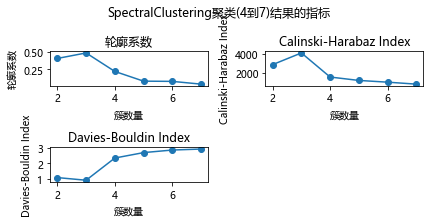

In [4]:

# 绘制轮廓系数曲线
plt.subplot(321)
plt.title('轮廓系数')
plt.plot(range(2, 8), silhouettes, marker='o')
plt.xlabel('簇数量')
plt.ylabel('轮廓系数')
# 绘制Calinski-Harabaz Index曲线
plt.subplot(322)
plt.title('Calinski-Harabaz Index')
plt.plot(range(2, 8),scores , marker='o')
plt.xlabel('簇数量')
plt.ylabel('Calinski-Harabaz Index')

# 绘制Davies-Bouldin Index曲线
plt.subplot(323)
plt.title('Davies-Bouldin Index')
plt.plot(range(2, 8),davies_list, marker='o')
plt.xlabel('簇数量')
plt.ylabel('Davies-Bouldin Index')

plt.suptitle('SpectralClustering聚类(4到7)结果的指标')
plt.tight_layout()
plt.show()

In [23]:
df = pd.DataFrame()
df['簇族']=[2,3,4,5,6,7]
df['轮廓系数'] = silhouettes
df['Davies-Bouldin Index'] = davies_list
df['Calinski-Harabaz Index'] = scores
df.to_csv('SpectralClustering聚类(2到7)结果的指标.csv')